# Introdution:

   In this experiment, I’ve examined the Martha’s Vineyard and Nantucket vessels data. Martha’s Vineyard (MV) and Nantucket (NT) are two Islands located in Massachusetts.  Either MV or NT don’t have roadway, the one possible way to reach these two places is  on a vessel. Steamship authority (SSA) is one of the ferry service provider for these two islands. Steamship authority has ships commute from Woods Hole to Martha’s Vineyard and Hyannis to Nantucket every day. Steamship authority tracks and monitor the vessel status to make them available to public. I’ve collected all the available vessels data from steamship authority for my analysis. My analysis in this study mainly focuses on what causing a vessel to have status cancelled (diverted, delayed), which month/season experiencing most number of vessel cancellations, is there in streak in vessel cancellations and is there any correlation in cancellations between two routes (MV and NT). I’ve also collected weather data (hourly) for MV and NT to understand potential relationship between weather conditions and vessel cancellations.
 
   In this report I present all my experimental results and supporting figures. In this study I’ve integrated the weather data with vessels data to feed resulting data to the decision tree classifier to find out relationship weather conditions and vessel status. In this study I present some statistics and visualizations to answer questions like which month/season experiencing most number of cancellations, is there any correlation between two routes, and is there any pattern/streak in vessel cancellations.
      
# Related Work:

Vessel traffic analysis:
Vessel traffic was identified as major issue of concern during  Monterey Bay National Marine Sanctuary(MBNMS) designation process beacause an oil spill could severely impact the sea otter population, to solve this problem  the United States Coast Guard (USCG) and the National Oceanic and Atmospheric Administration (NOAA) established a working group of key stakeholders in the issue of vessel traffic. The group recommendations include implementing tracks for vessels carrying hazardous materials to reduce the risk of groundings.In 2013  MBNMS resource protection staff working with a number of partners, made a decision to conduct an analysis on vessel use of the recommended tracks to determine if vessels were adhering tothe recommended tracks.

 


# Description:

  I’ve collected all vessels data needed for this analysis from www.stemshipauthoity.com .  it’s available for everyone here  https://m.steamshipauthority.com/schedule/MV/2014-10-05,   https://m.steamshipauthority.com/schedule/NT/2014-10-05. 
I've collected all the vessels data from 2006 to 2015(till Dec 3). if we click on that we can see that nice JSON file,this JSON file contains all vessels infomation like straing location,ending location ,starting time,ending time and status only for the data 2014-10-05. Since this data not  readily availble to download for total year ,I've written python script to scrape the data from this website www.steamshipauthority.com . I've collected vessels data fpr both MV and NT form 2006 to 2015 but I've used only data from 2011 to 2015 for this analysis since data from 2006 to 2010 doesn't ship status information.


    

In [3]:
import requests
from bs4 import BeautifulSoup
import json
import os
def pulldata(url,name,foldername):
    filename='nt'+name+'.json';
    
    print(url)
    if not os.path.exists(foldername):        
        os.makedirs(foldername)
    
    r=requests.get(url)
    soup= BeautifulSoup(r.content)
#print(soup)
    nt=soup.find("p").get_text()
#print(mv)
    with open(foldername+'/'+filename, 'w') as f:
        
        f.write(nt)

def run():
    
    import datetime
    import time
    url='https://m.steamshipauthority.com/schedule/NT/'
    date = datetime.date(2013,12,31)
    foldername='Dummy'
    for i in range(3):   #till how many days and for one year data it is 365
        
        date += datetime.timedelta(days=1)
        pulldata(url+str(date),str(date),foldername)
        #time.sleep(1)
        print(date)     
    
        
        
if __name__ == '__main__':
    run()

https://m.steamshipauthority.com/schedule/NT/2014-01-01
2014-01-01
https://m.steamshipauthority.com/schedule/NT/2014-01-02
2014-01-02
https://m.steamshipauthority.com/schedule/NT/2014-01-03
2014-01-03


Above we can see the python script for scarping data for Nantucket from www.steamshipauthority.com. Like wise I've collected data for MV. I've downloaded the wetaher data from http://mesowest.utah.edu/cgi-bin/droman/download_ndb.cgi manually from 2011 to 2015.

# Data aggregation and Integration:

Now I've vessels data from 2011 to 2015,Since the data I've collected  from steam ship authority is available in day wise so need to aggregate this data to make one single file for each year.

In [1]:
def data_aggregate():
    import pandas as pd
    import datetime
    
    appended_data = []    
    date = datetime.date(2013,12,31)
    for i in range(365):
        
        date += datetime.timedelta(days=1) 
        #print(date)
        try:
            
            data = pd.read_json('MV2014/'+str(date)+'.json')  # file path
            data['start']=data['start'].str.replace(r'(am|pm)', r' \1') # changing time format 6am to 6 am 
            #adding new column that store datetime in format for example 2015-01-01 21:45:00
            data['date_time']=data['start'].apply(lambda x: datetime.datetime.strptime(str(date)+' '+x, '%Y-%m-%d %I:%M %p'))  
            
        except Exception:
            pass
        appended_data.append(data)
    MV10 = pd.concat(appended_data, axis=0)
    MV10.to_csv('Vessels_MV14.csv')
    #cols = MV06.columns.tolist()
    #cols = cols[-1:] + cols[:-1]

    #print(MV10[['date_time','sloc']])

def run():
    data_aggregate()
    print("data aggregation is done")
    
        #merge(str(date))
        #time.sleep(1)
        #print(date)
if __name__ == '__main__':
    
    run()

data aggregation is done


In [3]:
import pandas as pd
df=pd.read_csv("Vessels_MV14.csv")
df.head()

,Unnamed: 0,eloc,end,icon,sloc,start,status,type,date_time
0,0,Vineyard Haven,6:45am,NaN,Woods Hole,6:00 am,On Time,Vehicle and Passenger,2014-01-01 06:00:00
1,1,Woods Hole,6:45am,NaN,Vineyard Haven,6:00 am,On Time,Vehicle and Passenger,2014-01-01 06:00:00
2,2,Vineyard Haven,7:45am,NaN,Woods Hole,7:00 am,On Time,Vehicle and Passenger,2014-01-01 07:00:00
3,3,Woods Hole,7:45am,NaN,Vineyard Haven,7:00 am,On Time,Vehicle and Passenger,2014-01-01 07:00:00
4,4,Vineyard Haven,9:00am,NaN,Woods Hole,8:15 am,On Time,Vehicle and Passenger,2014-01-01 08:15:00


Now the next step is to integrate weather data with vessels data. We are interested in looking at weather conditions  at time of  vessel starts from it's origin, So we have integrate weather data with vessels data to nearest time. Now I'm displaying wetaher file

In [2]:
import pandas as pd
df=pd.read_csv("W_MV2014.csv")
df.head()


,MON,DAY,YEAR,HR,MIN,TMZN,TMPF,RELH,SKNT,GUST,...,ALTI,WNUM,VSBY,CHC1,CHC2,CHC3,CIG,RMK,RAW,DWPF
0,1,1,2014,0,53,EST,28.0,48,11.5,21.9,...,30.21,NaN,10,701,900,NaN,NaN,AO2 SLP232 T10221117 11011 21028 53017 TSNO,KMVY 010553Z AUTO 29010G19KT 10SM CLR M02/M12 ...,10.9
1,1,1,2014,1,53,EST,26.1,44,13.8,20.7,...,30.24,NaN,10,701,1000,NaN,NaN,AO2 SLP239 T10331139 TSNO,KMVY 010653Z AUTO 31012G18KT 10SM CLR M03/M14 ...,7.0
2,1,1,2014,2,53,EST,25.0,44,11.5,NaN,...,30.27,NaN,10,1,NaN,NaN,NaN,AO2 SLP252 T10391144 TSNO,KMVY 010753Z AUTO 31010KT 10SM CLR M04/M14 A3027,6.1
3,1,1,2014,3,53,EST,25.0,40,12.7,24.2,...,30.29,NaN,10,701,1000,NaN,NaN,AO2 SLP258 T10391156 51026 TSNO,KMVY 010853Z AUTO 29011G21KT 10SM CLR M04/M16 ...,3.9
4,1,1,2014,4,53,EST,25.0,42,12.7,20.7,...,30.30,NaN,10,951,NaN,NaN,NaN,AO2 SLP260 T10391150 TSNO,KMVY 010953Z AUTO 32011G18KT 10SM CLR M04/M15 ...,5.0


Now we have to integrate  weather data with vessels to closest time

In [6]:
def data_Merge(v,w):
    import pandas as pd
    import datetime

    df2=pd.read_csv(v)

    df2['date_time']=df2['date_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    df=pd.read_csv(w)
    df['wdate_time']=df[['YEAR', 'MON', 'DAY', 'HR','MIN']].apply(lambda s : datetime.datetime(*s),axis = 1)
    df2 = df2.set_index("date_time")
    df = df.set_index("wdate_time", drop=False)
    df=df.groupby(df.index).first()

    df3=df.reindex(df2.index, method='nearest') 

    df3[['eloc','end','icon','sloc','start','status','type']]=df2[['eloc','end','icon','sloc','start','status','type']]
    #print(df3.columns)
    df3.to_csv('MV_w_v_data2014.csv')

    #print(df3[['start','wdate_time']])
def run():
    v='Vessels_MV14.csv'
    w='W_MV2014.csv'
    data_Merge(v,w)
    print("data merging is done")
    
    
if __name__ == '__main__':
    
    run()


data merging is done


In [7]:
import pandas as pd
df=pd.read_csv("MV_w_v_data2014.csv")
df.head()


,date_time,MON,DAY,YEAR,HR,MIN,TMZN,TMPF,RELH,SKNT,...,RAW,DWPF,wdate_time,eloc,end,icon,sloc,start,status,type
0,2014-01-01 06:00:00,1,1,2014,5,53,EST,24.1,47,9.2,...,KMVY 011053Z AUTO 30008G16KT 10SM CLR M04/M14 ...,7.0,2014-01-01 05:53:00,Vineyard Haven,6:45am,NaN,Woods Hole,6:00 am,On Time,Vehicle and Passenger
1,2014-01-01 06:00:00,1,1,2014,5,53,EST,24.1,47,9.2,...,KMVY 011053Z AUTO 30008G16KT 10SM CLR M04/M14 ...,7.0,2014-01-01 05:53:00,Woods Hole,6:45am,NaN,Vineyard Haven,6:00 am,On Time,Vehicle and Passenger
2,2014-01-01 07:00:00,1,1,2014,6,53,EST,26.1,38,11.5,...,KMVY 011153Z 29010G20KT 10SM CLR M03/M16 A3034,3.9,2014-01-01 06:53:00,Vineyard Haven,7:45am,NaN,Woods Hole,7:00 am,On Time,Vehicle and Passenger
3,2014-01-01 07:00:00,1,1,2014,6,53,EST,26.1,38,11.5,...,KMVY 011153Z 29010G20KT 10SM CLR M03/M16 A3034,3.9,2014-01-01 06:53:00,Woods Hole,7:45am,NaN,Vineyard Haven,7:00 am,On Time,Vehicle and Passenger
4,2014-01-01 08:15:00,1,1,2014,7,53,EST,27.0,35,11.5,...,KMVY 011253Z 29010G15KT 10SM FEW055 M03/M16 A3036,3.0,2014-01-01 07:53:00,Vineyard Haven,9:00am,NaN,Woods Hole,8:15 am,On Time,Vehicle and Passenger


Now I have the one file that  conatins vessels data with weather conditions recored at the time of a  given vessel starting from it's origin. 

# Results and Discussion:
Now we have the both vessels data and  weather data at one place,the next step is to analyze this data to answer our questions.
Based on weather now I predict the vessel status on particular day using machine learning . For this analysis,I use the Decision tree classifier. I feed the algoirthm with wind gust ,wind speed ,temperature,humidity,precipitation,visibilty..etc to predict status of vessel and train the classifier on 80% of the data and test it on remaining 20%. The Decsion tree algorithm consistently returning score of >=0.95 . 

In [8]:
def score(name):
    
    import pandas as pd
    from sklearn import svm
    from sklearn.cross_validation import train_test_split
    from sklearn import tree
    f=pd.read_csv(name)
    f.drop(['ALTI','RMK','RAW','WNUM','CHC1','CHC2','CHC3','TMZN','icon'],inplace=True,axis=1)
    features=f['status']

    samples=f[['MON','DAY','YEAR','HR','MIN','SKNT','GUST','RELH','TMPF','DRCT','QFLG','VSBY','CIG','DWPF']]

    features=features.fillna(0)
    samples=samples.convert_objects(convert_numeric=True)
    samples=samples.fillna(0)

    sample_train, sample_test,feature_train,feature_test = train_test_split(samples,features,test_size=0.20)
    clf2= tree.DecisionTreeClassifier()
    clf2=clf2.fit(sample_train,feature_train)
    sc2=clf2.score(sample_test,feature_test)
    tree.export_graphviz(clf2,out_file=name+'classtree4.dot')
    print(sc2)
def run():
    #print("score for Nantucket route")
    #score("NT_w_v_data2013.csv")
    print("score for Martha's Vineyard route")
    score("MV_w_v_data2014.csv")     

if __name__ == '__main__':
    
    run()

score for Martha's Vineyard route
0.970736629667


If we look at the tree generated by decision tree classifier algorithm we can infer that wind gust and wind speed is showing major impact on vessel status. Now let's predcit vessel status again on particular day but feed the algorithm with only wind gust and wind speed.This time Decision tree classfier algorithm giving score consistently >=0.98

In [9]:
import pandas as pd
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import tree
f=pd.read_csv("MV_w_v_data2012.csv")
f.drop(['ALTI','RMK','RAW','WNUM','CHC1','CHC2','CHC3','TMZN','icon'],inplace=True,axis=1)
#f=f[(f.GUST.isnull()!=True)]
#f['status_num']=f['status'].apply(lambda x: 1 if(x=='On Time') else 0)
features=f['status']

samples=f[['SKNT','GUST']]   #,'GUST'

#features=features.fillna(0)
samples=samples.convert_objects(convert_numeric=True)
samples=samples.fillna(0)

sample_train, sample_test,feature_train,feature_test = train_test_split(samples,features,test_size=0.20)
clf2= tree.DecisionTreeClassifier()
clf2=clf2.fit(sample_train,feature_train)
sc2=clf2.score(sample_test,feature_test)
tree.export_graphviz(clf2,out_file='classtree6.dot')
print(sc2)

0.989457831325


By looking at decion tree that is  genertated by decision tree classifier we can infer that when wind gust is speed more than 30mph almost all vessels are getting cancelled. when wind speed is more than 20 mph 95% of vessels are having status of either cancelled or diverted.

Now let see which month/season experiencing most number of vessels that are not running on time(can be cancelled or diverted or delayed). for this task I calculate number of vessels that were not on time by each month for 2012,2013,2014(Here I've not used 2011 and 2015 due to incomplete data. steam ship authority  recorded status of vessels for year 2011 from june 2011.For 2015 I've collected data only till Dec 3).

C:\Users\kalesha\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: 'U' mode is deprecated


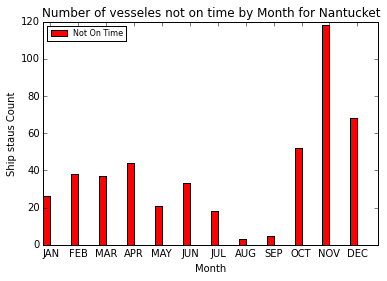

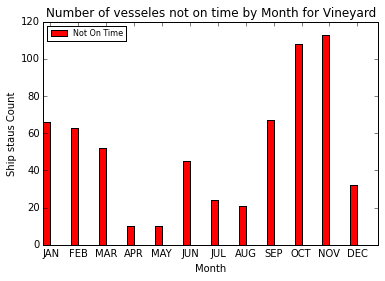

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import tree
    
import array
import matplotlib.pyplot as plt
import csv
def plotmonth(filename):
    
    
    file = []
    with open(filename, "rU") as f:
        
        reader = csv.reader(f)
        for i in range(1): next(reader)
        for row in reader:
                        
            file.append(row)
#file=pd.read_csv("MV_w_v_data2012.csv",sep='|',skiprows=1)  
    status={}
    tcount=0
    ntcount=0
#file=file['MON'].apply(str)
#print(file.dtypes)
    for row in file:
        
    
    
        if row[1] not in status:
            
        #print(row[1])
            status[row[1]]={}
            tcount=0
            ntcount=0
            tavgust=0
            ntavgust=0
            if row[29]=='On Time':
                
                tcount=tcount+1
            #tavgust=float(row[9])+tavgust
            
                status[row[1]]['Time']=tcount
                
                status[row[1]]['NTime']=ntcount
            else:
                ntcount=ntcount+1
            
                status[row[1]]['NTime']=ntcount
                
                status[row[1]]['Time']=tcount
            
        else:            
            if row[29]=='On Time':                
                tcount=tcount+1          
                status[row[1]]['Time']=tcount           
            else:
                
                ntcount=ntcount+1
            #ntavgust=ntavgust+float(row[10])
                status[row[1]]['NTime']=ntcount
    
    #print(status)            
    i = 1
    Not_OnTime=[]
    On_Time=[]
    while (i <= 12):
        
    #print(i)
        Not_OnTime.append(status[str(i)]['NTime'])
        On_Time.append(status[str(i)]['Time'])
    
        i=i+1

    return Not_OnTime
def plotbar(Not_OnTime,route):
    
    N=12
    ind = np.arange(N) 
    width = 0.25
    fig, r = plt.subplots()
    rect = r.bar(ind, Not_OnTime, width, color='r', label='Not On Time')
#rect2=r.bar(ind+width, On_Time, width, color='b', label='On Time')
    r.set_ylabel('Ship staus Count')
    r.set_xlabel('Month')
    r.set_title('Number of vesseles not on time by Month for '+route)
    r.set_xticks(ind+width)
    r.set_xticklabels( ('JAN', 'FEB', 'MAR', 'APR', 'MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC') ) 
    plt.legend(loc='upper left',prop={'size':8})   
    #plt.tight_layout()
    plt.show()

def run():
    result={}
    for i,file in enumerate(["NT_w_v_data2012.csv","NT_w_v_data2013.csv","NT_w_v_data2014.csv"]) :
        result[i] = plotmonth(file)
    #print(type(result[0]))
    total=[a + b+c for a, b,c in zip(result[0], result[1],result[2])]
    #plotbar(result[1],"Nanutucket")
    plotbar(total,"Nantucket")
    for i,file in enumerate(["MV_w_v_data2012.csv","MV_w_v_data2013.csv","MV_w_v_data2014.csv"]) :
        result[i] = plotmonth(file)
    total=[a + b+c for a, b,c in zip(result[0], result[1],result[2])]
    plotbar(total,"Vineyard")

if __name__ == '__main__':
    
    run()

By looking at above bar charts we can infer that november month experiencing  most number vessels that were not running on time.Most of the times in month of november the wind speeds are more than 20 mph. We can also observe that significant differnece between two routes in month of september because MV has experienced more number of days with wind speed >=20 than NT.



Now comapre cancellations between two routes(NT and MV). For this purpose I compute some stastics,initially I calculte count of vessels that not on time per each day over a year for both routes.Now I compute % vessels that are not running on time on both routes when number of vessels not on time are >=3 in Nantucket route 

comapring NT and MV 
Showing cancellations in MV when more than 2 cancellations(per day) in NT 2012


C:\Users\kalesha\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: 'U' mode is deprecated


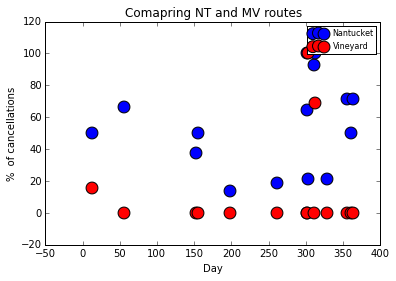

Showing cancellations in MV when more than 2 cancellations(per day) in NT 2013


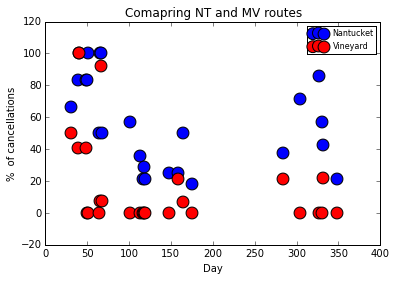

Showing cancellations in MV when more than 2 cancellations(per day) in NT 2014


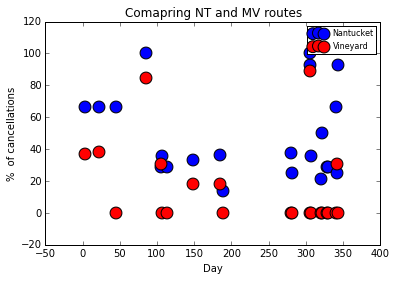

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
def getdataByDay(filename):
    from sklearn import svm
    from sklearn.cross_validation import train_test_split
    from sklearn import tree
    import numpy as np
    import array
    import matplotlib.pyplot as plt
    import csv
    file = []
    with open(filename, "rU") as f:
        
        reader = csv.reader(f)
        for i in range(1): next(reader)            
        for row in reader:            
            file.append(row)
    tcount=0
    ntcount=0
    Day={}
    print(file)
        
    
def getdata(filename):
    
    from sklearn import svm
    from sklearn.cross_validation import train_test_split
    from sklearn import tree
    import numpy as np
    import array
    import matplotlib.pyplot as plt
    import csv
    file = []
    with open(filename, "rU") as f:
        
        reader = csv.reader(f)
        for i in range(1): next(reader)            
        for row in reader:
            
            file.append(row)
#file=pd.read_csv("MV_w_v_data2012.csv",sep='|',skiprows=1)  
    status={}
    plotst={}
    tcount=0
    ntcount=0
    day='0'
    for row in file:      
       
        if row[1] not in status:
            status[row[1]]={}   
            
        
                 

            if row[2] not in status[row[1]]:
                
                tcount=0
                ntcount=0
                tavgust=0
                ntavgust=0
                day=str(int(day)+1)
                plotst[day]={}
                status[row[1]][row[2]]={}
                if row[29]=='On Time':
                    tcount=tcount+1
                  
                    status[row[1]][row[2]]['Time']=tcount
                
                    #status[row[2]][row[2]]['NTime']=ntcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
                
                else:
                    tcount=tcount+1          
               
                    ntcount=ntcount+1           
                    status[row[2]]['NTime']=ntcount
                #status[row[2]]['NTgust']=ntavgust
                    status[row[2]]['Time']=tcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
        
            
            
        else:
            
            if row[2] not in status[row[1]]:
                tcount=0
                ntcount=0
                tavgust=0
                ntavgust=0 
                status[row[1]][row[2]]={}
                day=str(int(day)+1)
                plotst[day]={}
                if row[29]=='On Time':
                    tcount=tcount+1            
                
                    status[row[1]][row[2]]['Time']=tcount
                    status[row[1]][row[2]]['NTime']=ntcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
            #status[row[1]]['Tgust']=tavgust
                else:
                    ntcount=ntcount+1
                
                    status[row[1]][row[2]]['NTime']=ntcount
                    status[row[1]][row[2]]['Time']=tcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
                #status[row[1]][row[2]]['NTgust']=ntavgust
            else:
                
                if row[29]=='On Time':
                    tcount=tcount+1 
                    status[row[1]][row[2]]['Time']=tcount
                    plotst[day]['Time']=tcount               
                
                #plotst[day]['NTime']=ntcount
                
            
                else:
                    ntcount=ntcount+1
                    status[row[1]][row[2]]['NTime']=ntcount
                    plotst[day]['NTime']=ntcount
                    
    i = 1
    #Not_OnTime=[]
    #print(day)
    #print(plotst)
    Not_OnTime={}
    lb=[]
    while(i<=364):
        
        
        
        Not_OnTime[i]={}
        Not_OnTime[i]['Time']=plotst[str(i)]['Time']
        Not_OnTime[i]['NTime']=plotst[str(i)]['NTime']
            
            #Not_OnTime.append(plotst[str(i)]['NTime'])
        i=i+1
        
    #print(plotst.lenght)
    
    
    #print(Not_OnTime)       
    return Not_OnTime    


#data = [trace]

# Plot and embed in ipython notebook!
#py.iplot(data, filename='basic-scatter')
def sharedDay(f1,f2):
    NT=pd.DataFrame.from_dict(f1, orient='index', dtype=None)
    NT=NT[(NT.NTime != 0)]
    NT['%NT_Not_OnTime']=(NT['NTime']/(NT['NTime']+NT['Time']))*100
    MV=pd.DataFrame.from_dict(f2, orient='index', dtype=None) 
    MV=MV[(MV.NTime != 0)]
    MV.columns=['MV_Time','MV_NTime']
    MV['%MV_Not_OnTime']=(MV['MV_NTime']/(MV['MV_NTime']+MV['MV_Time']))*100
    
    NT_MV=pd.concat([NT, MV], axis=1, join='inner')
    #NT_MV['%NT_Not_OnTime']=(NT_MV['NTime']/(NT_MV['NTime']+NT_MV['Time']))*100
    #NT_MV['%MV_Not_OnTime']=(NT_MV['MV_NTime']/(NT_MV['MV_NTime']+NT_MV['MV_Time']))*100
    
    print(NT_MV)
       
    
    
def findDiff(f1,f2):
    NT=pd.DataFrame.from_dict(f1, orient='index', dtype=None)
    #print(NT)
    NT=NT[(NT.NTime >= 3)]
    NT['%NT_Not_OnTime']=(NT['NTime']/(NT['NTime']+NT['Time']))*100
    MV=pd.DataFrame.from_dict(f2, orient='index', dtype=None)    
    MV.columns=['MV_Time','MV_NTime']
    MV['%MV_Not_OnTime']=(MV['MV_NTime']/(MV['MV_NTime']+MV['MV_Time']))*100
    
    NT_MV=NT.join(MV)    
    #print(MV)
    #print(NT_MV)
    return NT_MV
   
def plotScatter(df):   
    
    x=df.index.values
    y1=df['%NT_Not_OnTime'].values
    y2=df['%MV_Not_OnTime'].values
    fig,r = plt.subplots()
    r.set_ylabel('%  of cancellations')
    r.set_xlabel('Day')
    r.set_title('Comapring NT and MV routes')
   
    plt.scatter(x,y1,c='b', marker="o",s=140, label='Nantucket')
    plt.scatter(x,y2,c='r', marker="o", s=140, label='Vineyard')
    plt.legend(loc='upper right',prop={'size':8});
    plt.show()
    
    
def run():
    #getdataByDay("MV_w_v_data2014.csv")
    NT={}
    for i,file in enumerate(["NT_w_v_data2012.csv","NT_w_v_data2013.csv","NT_w_v_data2014.csv"]) :
        NT[i] = getdata(file)
    MV={}
    for i,file in enumerate(["MV_w_v_data2012.csv","MV_w_v_data2013.csv","MV_w_v_data2014.csv"]) :
        MV[i] = getdata(file) 
    
    
    print("comapring NT and MV ")
    print("Showing cancellations in MV when more than 2 cancellations(per day) in NT 2012")
    NT_WV=findDiff(NT[0],MV[0])
    plotScatter(NT_WV)
    print("Showing cancellations in MV when more than 2 cancellations(per day) in NT 2013")
    NT_WV=findDiff(NT[1],MV[1])
    plotScatter(NT_WV)
    print("Showing cancellations in MV when more than 2 cancellations(per day) in NT 2014")
    NT_WV=findDiff(NT[2],MV[2])
    plotScatter(NT_WV)
    

if __name__ == '__main__':
    
    run()

By looking at above scatterplots we can infer that there is significant difference between two routes in terms number of cancellations, you can see that  % cancellations in MV consistently falling below 10% when number of cancellations in Nantucket is more than two.
perhaps,one of  the reason for Nantucket route has more vessels not on time may be due to it's longer route when comapred to Martha's vineyard route,so for this reason steam ship authority may be cancelling/delaying/diverting vessels even weather is not too severe. 

Now let's find is there any patterns/trends when vessels are not on time. For this purpose I calculate count of vessels that are not on time per each day over a year.

C:\Users\kalesha\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: 'U' mode is deprecated


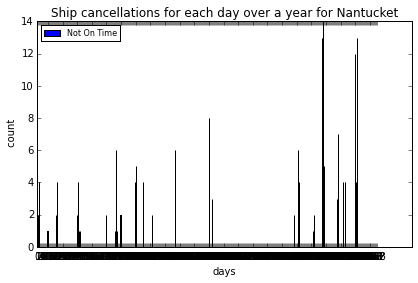

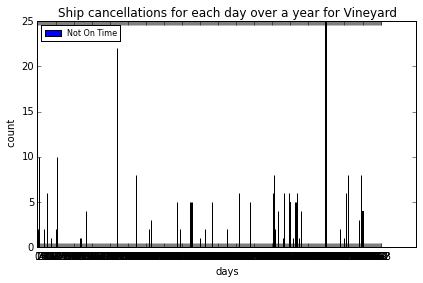

In [15]:
%matplotlib inline
import pandas as pd
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import tree
import numpy as np
import array
import matplotlib.pyplot as plt
import csv
def plotbar_day(filename,route):
    file = []
    with open(filename, "rU") as f:
        reader = csv.reader(f)
        for i in range(1): next(reader)
        for row in reader:
            file.append(row)
    #file=pd.read_csv("MV_w_v_data2012.csv",sep='|',skiprows=1)  
    status={}
    plotst={}
    tcount=0
    ntcount=0
    day='0'
    #file=file['MON'].apply(str)
    #print(file.dtypes)
    for row in file:
        #print(row[29])
        #print(row[29])

        if row[1] not in status:
            #print(row[1])
            status[row[1]]={}

            if row[2] not in status[row[1]]:
                tcount=0
                ntcount=0
                tavgust=0
                ntavgust=0
                day=str(int(day)+1)
                plotst[day]={}
                status[row[1]][row[2]]={}
                if row[29]=='On Time':
                    #day=str(int(day)+1)
                    #plotst[day]={}
                    tcount=tcount+1
                #tavgust=float(row[9])+tavgust

                    status[row[1]][row[2]]['Time']=tcount
                    #status[row[1]][row[2]]['Tgust']=tavgust
                    status[row[2]][row[2]]['NTime']=ntcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
                else:

                    tcount=tcount+1

                    ntcount=ntcount+1
                #ntavgust=ntavgust+float(row[10])

                    status[row[2]]['NTime']=ntcount
                    #status[row[2]]['NTgust']=ntavgust
                    status[row[2]]['Time']=tcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount



        else:
            if row[2] not in status[row[1]]:
                tcount=0
                ntcount=0
                tavgust=0
                ntavgust=0 
                status[row[1]][row[2]]={}
                day=str(int(day)+1)
                plotst[day]={}
                if row[29]=='On Time':

                    tcount=tcount+1        
                #tavgust=float(row[9])+tavgust
                    status[row[1]][row[2]]['Time']=tcount
                    status[row[1]][row[2]]['NTime']=ntcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
                #status[row[1]]['Tgust']=tavgust
                else:

                    ntcount=ntcount+1
                #ntavgust=ntavgust+float(row[10])
                    status[row[1]][row[2]]['NTime']=ntcount
                    status[row[1]][row[2]]['Time']=tcount
                    plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
                    #status[row[1]][row[2]]['NTgust']=ntavgust
            else:
                if row[29]=='On Time':

                    tcount=tcount+1        

                    status[row[1]][row[2]]['Time']=tcount
                    plotst[day]['Time']=tcount
                    #plotst[day]['NTime']=ntcount


                else:

                    ntcount=ntcount+1
                #ntavgust=ntavgust+float(row[10])
                    status[row[1]][row[2]]['NTime']=ntcount
                    #plotst[day]['Time']=tcount
                    plotst[day]['NTime']=ntcount
                    #status[row[1]][row[2]]['NTgust']=ntavgust

    i = 1
    Not_OnTime=[]
    lb=[]
    while (i <=364): 
        #print(i)
        lb.append(i)
        Not_OnTime.append(plotst[str(i)]['NTime'])    
        i=i+1
    N=364

    ind = np.arange(N) 
    width = 0.05
    #sp=0.25
    fig, r = plt.subplots()
    rect = r.bar(ind, Not_OnTime, width, color='b', label='Not On Time')
    #rect2=r.bar(ind+width, On_Time, width, color='b', label='On Time')
    r.set_ylabel(' count')
    r.set_xlabel('days')
    r.set_title('Ship cancellations for each day over a year for '+route)
    r.set_xticks(ind+width)
    #r.set_xticklabels( lb ) 

    plt.legend(loc="upper left",prop={'size':8})   
    plt.tight_layout()
    plt.show()
def run():
                
    plotbar_day('NT_w_v_data2014.csv',"Nantucket")            
    plotbar_day('MV_w_v_data2014.csv',"Vineyard")
               
                

if __name__ == '__main__':
    
    run()
#plotst['2']    

This bar charts drwan with width of 0.05 and we can see some thick lines in above bar chart which suggest that vessels were not run on time on those days continuously .


#  Conclusion and future work:
 
 In this analysis I've found that wind gust and wind speed is having major impact on vessels status. The decision tree classifier is giving score >=0.98 consisently if we feed the algorithm with wind gust and wind spped to predict vessel status on particular day. It is also found that when wind gust is more than 30 mph most number of vessels are getting cancelled. It is true  that if we  comapre two routes then there are more number of cancellations in Nantucket route.
 
The future work for this project could be finding  out if there is  interesting changes in terms of number of  cancellations  over past 5 years ?if so, does  the number of cancellations are getting decresed or increased? if the number  decreasing , it would be interesting to find out what causing this change ? does weather conditions are getting better over the time or does vessel manufactures manfacturing vessels in such way  to sustain in harsh weather conditions?
The future work for this project could also be getting the real time vessels data for this routes and to explore things like  when divertion happens what routes the vessels  usually following? which vessel(name of vessel) experiencing most number of cancellations or divertions?


# Bibliography:
I've collected vessels data from 
https://m.steamshipauthority.com/schedule/MV/2014-10-05
https://m.steamshipauthority.com/schedule/NT/2014-10-05

I've collected weather data from
http://mesowest.utah.edu/cgi-bin/droman/download_ndb.cgi

related work referred from 
http://montereybay.noaa.gov/resourcepro/reports/140127mbnms-ais_report.pdf

